# <p style="background:#40180D;color:#ffffff; text-align:center;font-size:24px;padding:10px;font-family:Sans-serif"> EDA2 - Feature Selection / Feature Engineering</p>


### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Import required libraries</p>

In [2]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import matplotlib.pylab as plt
import seaborn as sns

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Load Dataset</p>

In [3]:
df = pd.read_csv('adult_with_headers.csv')
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Data Exploration and Preprocessing:</p>

In [4]:
## Making a copy of a dataset so the original dataset does not affect
df1 = df.copy()
df2 = df.copy()

In [5]:
df1.shape

(32561, 15)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observations :**
* From the descriptive summary, we can see the there is presence of the outliers in capital_gain an capital_loss columns. 
* There is huge difference between the mean and max values. 
* The standard deviation for the capital gain and capital loss features standard devatiaon is high, this meansthe data is spread towards positive side having highe skewness.

In [8]:
df1.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**Obsevations :**
* Above all are the categorical features, the income is a target feature which contains 2 unique values income is less than or equal to 50k and income is greater than 50k.
* Other than that other features are input features, in which race and sex features contain unique values less than and equel to 5 and other features contains more than 5 unique values.
* We can see, mode of the features, the most of the males form the united states, with prof spciality have income less than and equal to 50k.

In [9]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**Observation :**
* There is no presence of any null values in any of the features
* Before converting numerical features to the same scale using standard or minmax scaler, we will separate the input features and target feature.

In [10]:
## Separting the input and target features.

#X = df1.iloc[:,:-1]
#y = df1.iloc[:,-1]

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Feature Engineering:</p>
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [11]:
df1.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


**Key Insights :**
* we will create column net capital, instead of calculation gain and loss in separate columns
* Rational behind this, instead of treating gains and losses separately, this feature represents the net effect of both, which can directly indicate overall capital impact on income.
* This can help the model understand whether someone had a positive or negative capital change in a single metric where
* net_capital = capital_gain - capital_loss
* The second column can be age_group
* This feature categorises the age groups in 4 different categories. like, age group 16-30 Young age, 31 -45 Intermidiate, 46 - 65 Senior, 66 - 100 Elderly

In [12]:
### Creating 2 new features 
## net_capital = capital_gain - capital_loss
## New feature 1
df1['net_capital'] = df1['capital_gain'] - df1['capital_loss']

## new feature 2
## age Group using bins categories

df1['age_group'] = pd.cut(df1['age'], bins=[16,30,45,65,100], labels=['Young', 'Intermediate','Senior','Elderly']).astype(object)


In [13]:
df1.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174,Intermediate
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Senior
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Intermediate
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Senior
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Young


**Observations :**
* We have created 2 new features, net_capital will give both gain and loss effect on income in single column
* and age group can be categoried to get certain people categorised based a=on ages groups will help in sort the people

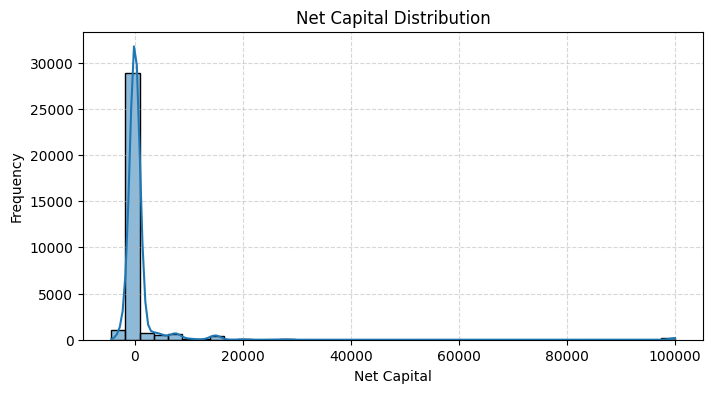

In [14]:
plt.figure(figsize=(8,4))

sns.histplot(df1['net_capital'], bins=40, kde=True)
plt.title('Net Capital Distribution')
plt.xlabel('Net Capital')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Observations :**
* From the histogram plot for the data is highly skewed for net_capital towards positive side
* Due to high skewness ijn net_capital feature, we will apply log transformation so it will help in compress extreme values and reduce the skewness
* The 'net_capital' feature is likely to be highly skewed due to many individuals having zero or low gains/losses
and a few having very large values. This skewness can hurt model performance by giving too much weight to extreme values.
A log transformation compresses the range, reduces skewness, and makes the distribution closer to normal, which helps
many machine learning algorithms perform better.

### Log Transformation

In [15]:
# Log value for 0 and negative values is undefined, so we will shift the values 
shift_value = df1['net_capital'].min()

if shift_value <= 0:
    shift_value = abs(shift_value) + 1
else:
    shift_value = 0

## applying log transformation

df1['net_capital_log'] = np.log(df1['net_capital'] + shift_value)

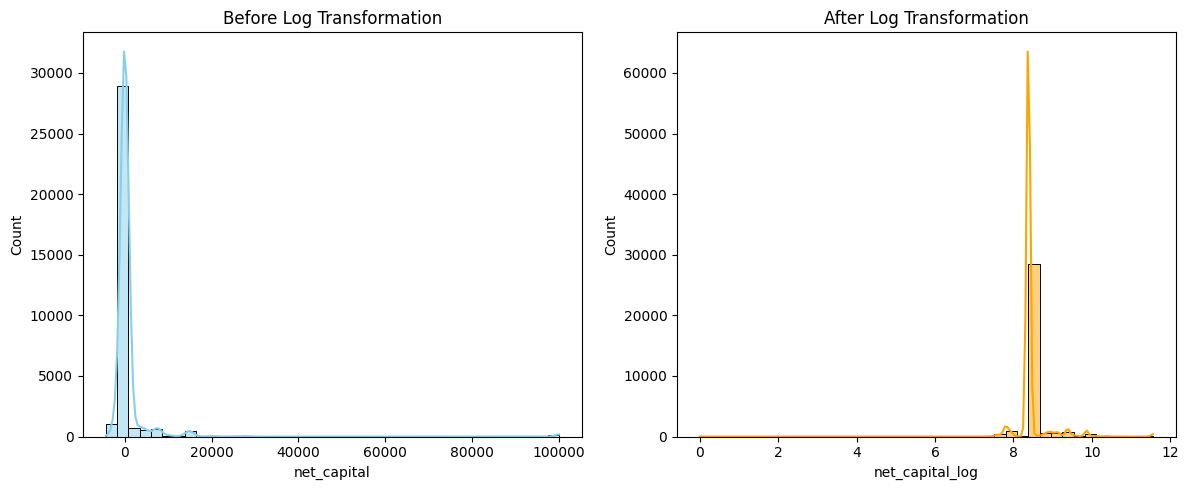

In [16]:
# Plot before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df1['net_capital'], bins=40, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Before Log Transformation")

sns.histplot(df1['net_capital_log'], bins=40, kde=True, color='orange', ax=axes[1])
axes[1].set_title("After Log Transformation")

plt.tight_layout()
plt.show()

**Observations :**
* we can see the difference from the histogram before and after log transformation.
* The highly skewed data is likely to be normaly distributed after the log transformation

### Standardizaton 
Scaling numerical features to the similar scale

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
sc = StandardScaler()

In [19]:
## Getting only numerical columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns


In [20]:
df1[num_cols] = sc.fit_transform(df1[num_cols])

In [21]:
df1[num_cols].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,net_capital,net_capital_log
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17,1.745752e-17,2.262058e-15
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-7.216138e-01,-2.198886e+01
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,-1.336701e-01,-1.548655e-01
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02,-1.336701e-01,-1.548655e-01
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,-1.336701e-01,-1.548655e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00,1.336352e+01,8.120687e+00


**Observations :**
* After applying Standard Scaler on the numerical feaures, all the standardized columns are transformed to mean = 0 and standard deviation = 1.

In [22]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,age_group,net_capital_log
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K,0.159762,Intermediate,0.899833
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K,-0.133670,Senior,-0.154866
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K,-0.133670,Intermediate,-0.154866
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K,-0.133670,Senior,-0.154866
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K,-0.133670,Young,-0.154866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K,-0.133670,Young,-0.154866
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K,-0.133670,Intermediate,-0.154866
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K,-0.133670,Senior,-0.154866
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K,-0.133670,Young,-0.154866


### MinMaxScaler

In [23]:
df2.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [24]:
ms = MinMaxScaler()

In [25]:
## Getting only numerical columns
num_cols2 = df2.select_dtypes(include=['int64', 'float64']).columns

In [26]:
df2[num_cols2] = ms.fit_transform(df2[num_cols2])

In [27]:
df2.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



**Observations :**
* Min max scaler scales features to the fixed ranges between 0 to 1.
* The standard scaler transforms features assuming the data is normaly distributed by making the mean = 0 and standard deviation = 1. 
* The min max scaler transforms features in the fixed range 0 to 1.
* Both are sensitive to outliers, before scaling the data, if outliers are present that should be treated.
* The shape of the data changes in standard scaler, while min max scaler preserves the shape of the data.
* If you have normaly distirbuted data, use standard scaler.
* If you want to keep the shape of the data unchanged and values bounded use min max scaler.

In [28]:
## Getting numerical column from original data
num_cols_org = df.select_dtypes(include=['int64', 'float64']).columns

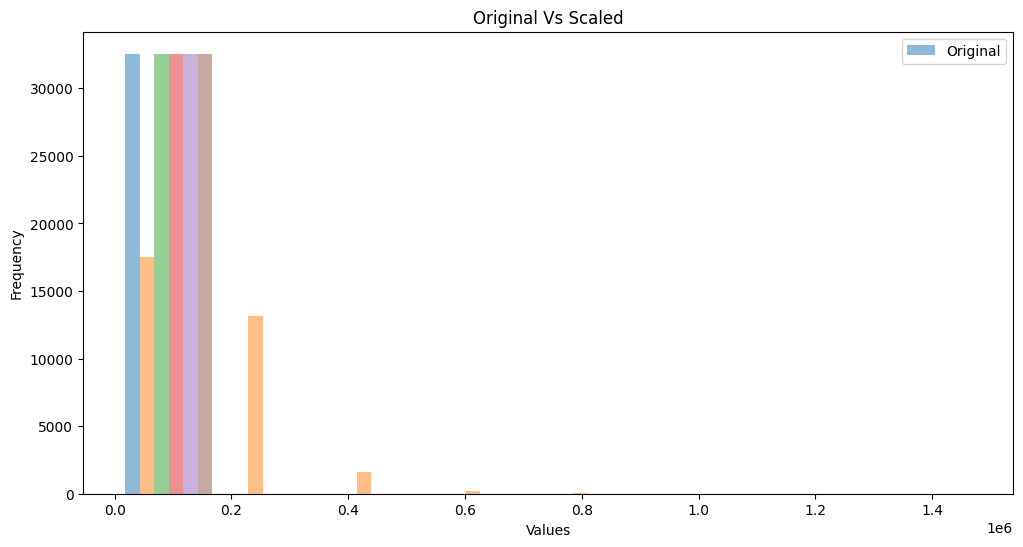

In [29]:
plt.figure(figsize=(12,6))

plt.hist(df[num_cols_org], bins=8, alpha=0.5, label='Original')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Original Vs Scaled')

plt.legend()
plt.show()

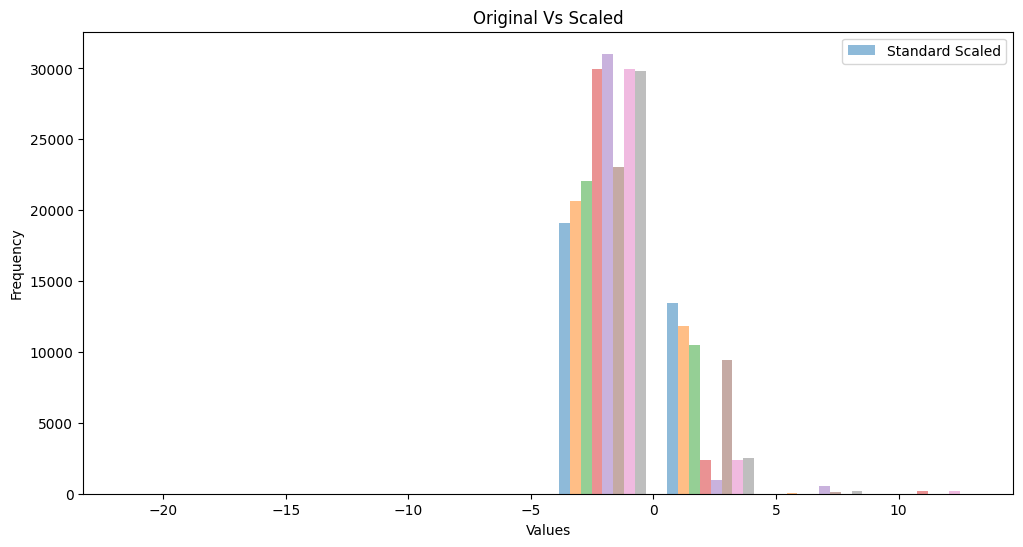

In [30]:
plt.figure(figsize=(12,6))

plt.hist(df1[num_cols], bins=8, alpha=0.5, label='Standard Scaled')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Original Vs Scaled')

plt.legend()
plt.show()

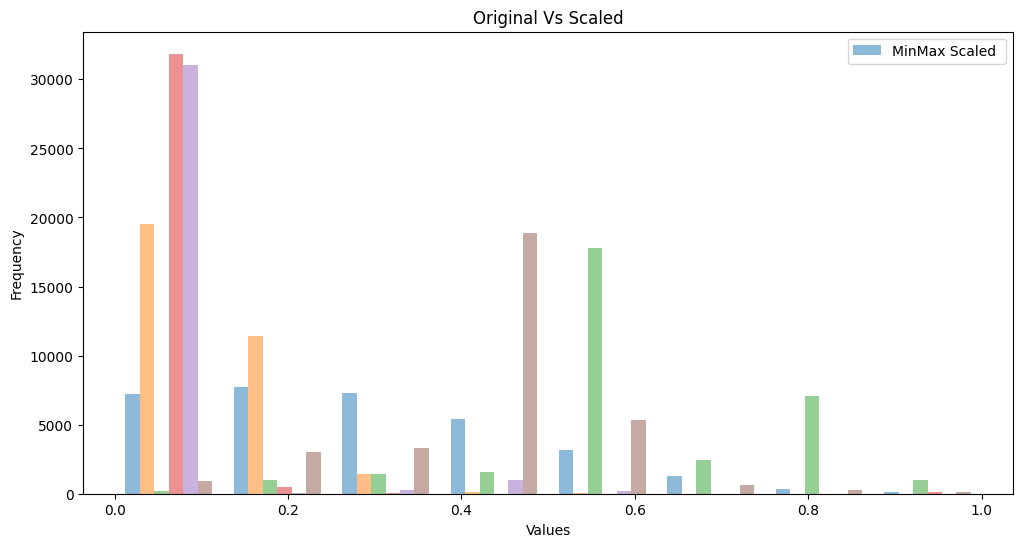

In [31]:
plt.figure(figsize=(12,6))

plt.hist(df2[num_cols2], bins=8, alpha=0.5, label='MinMax Scaled ')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Original Vs Scaled')

plt.legend()
plt.show()

**Observations :**
* Above 3 plots depicts
* The orginal data is clustred around the original data values
* The Standar scaled data is transformed around mean = 0 and standard deviation equal to 1
* & with the min max scaler, the data is transformed between the range 0 to 1

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Encoding Techniques:</p>
* Apply One-Hot Encoding to categorical variables with less than 5 categories.* 	Use Label Encoding for categorical variables with more than 5 categories.


In [32]:
df1.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,age_group,net_capital_log
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K,0.159762,Intermediate,0.899833
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K,-0.133670,Senior,-0.154866
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K,-0.133670,Intermediate,-0.154866


**Key Insights :**
* We will use stadardized dataset transformed using Standard scaler, the only capital_gain and capital_loss features have high values and asyemmetric data. So we have transformed these numerical columns assuming that it has mean as zero and standard deviation as one.
* Now we will apply one hot encoding to catogorical features having less than five categories, as OHE creates new dimention for the values to display as true.
* And we will use Lable encoding for categorical features having more than 5 categories, it changes the values in the same single column.

In [33]:
df1.dtypes

age                float64
workclass           object
fnlwgt             float64
education           object
education_num      float64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain       float64
capital_loss       float64
hours_per_week     float64
native_country      object
income              object
net_capital        float64
age_group           object
net_capital_log    float64
dtype: object

In [34]:
df1.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,age_group
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,Intermediate
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720,12362


**Observation :**
* We will apply label encoding on the workclass, education, marital_status, occupation, relationship and native_country features, as it has categories more than 5.
* We can see the unique values numbers of each categorical column
* **income** is a target feature, it has unique values less than 5 and it is a binary class classification.
* We do not apply OHE on target feature as it creates new dimention for the cateories, so we will apply lable encoding on income column.

In [35]:
df1['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
cols_le_encode = ['workclass','education','marital_status','occupation','relationship','native_country','income']

# Encoding the selected columns 
for col in cols_le_encode:
    df1[col] = le.fit_transform(df1[col])

In [39]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,age_group,net_capital_log
0,0.030671,7,-1.063611,9,1.134739,4,1,1,White,Male,0.148453,-0.21666,-0.035429,39,0,0.159762,Intermediate,0.899833
1,0.837109,6,-1.008707,9,1.134739,2,4,0,White,Male,-0.145920,-0.21666,-2.222153,39,0,-0.133670,Senior,-0.154866
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,White,Male,-0.145920,-0.21666,-0.035429,39,0,-0.133670,Intermediate,-0.154866
3,1.057047,4,0.425801,1,-1.197459,2,6,0,Black,Male,-0.145920,-0.21666,-0.035429,39,0,-0.133670,Senior,-0.154866
4,-0.775768,4,1.408176,9,1.134739,2,10,5,Black,Female,-0.145920,-0.21666,-0.035429,5,0,-0.133670,Young,-0.154866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,White,Female,-0.145920,-0.21666,-0.197409,39,0,-0.133670,Young,-0.154866
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,White,Male,-0.145920,-0.21666,-0.035429,39,1,-0.133670,Intermediate,-0.154866
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,White,Female,-0.145920,-0.21666,-0.035429,39,0,-0.133670,Senior,-0.154866
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,White,Male,-0.145920,-0.21666,-1.655225,39,0,-0.133670,Young,-0.154866


In [40]:
print(df1['workclass'].value_counts(), df1['education'].value_counts())

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: workclass, dtype: int64 11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: education, dtype: int64


In [41]:
# target feature is encoded to binary classification
df1['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

**Observations :**
* After applying label encoding, the encoded features are transformed into numerical format is same column.
* workclass has 9 unique values, it is encoded with 0 - 8 classes.
* education has 16 unique values, it is encoded with 0 - 15 classes.
* Likewise other columns are also encoded.
* We can see the target feature is also encoded and converted into binary classification 0's are encoded with the income <=50K  and 1's are encoded with income >50K in the same column as the target feature required.
* Now we have 2 more race and sex columns having categories less than 5 we will apply OHE on these features


### One Hot Encoding (OHE) - get_dummies()

**Key Insights :**
* We will use pandas short hand function for One Hot Encoding. It is easy to use and does not require to import One Hot encoding from the sklearn library.
* get_dummies() from pandas does the same job in a single line.

In [42]:
df1.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,age_group,net_capital_log
0,0.030671,7,-1.063611,9,1.134739,4,1,1,White,Male,0.148453,-0.21666,-0.035429,39,0,0.159762,Intermediate,0.899833
1,0.837109,6,-1.008707,9,1.134739,2,4,0,White,Male,-0.145920,-0.21666,-2.222153,39,0,-0.133670,Senior,-0.154866


In [43]:
df1_encoded = pd.get_dummies(df1, columns=['race', 'sex', 'age_group'], dtype='int64')

In [44]:
df1_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,0,1,0,1,0,1,0,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,0,1,0,1,0,0,1,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,0,1,0,1,0,1,0,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,0,1,0,0,0,1,0,0,1,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,0,0,1,1,0,0,0,0,1
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,0,0,1,0,1,0,1,0,0
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,0,0,1,1,0,0,0,1,0
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,0,1,0,1,0,0,0,1


In [45]:
df1_encoded.dtypes

age                         float64
workclass                     int32
fnlwgt                      float64
education                     int32
education_num               float64
marital_status                int32
occupation                    int32
relationship                  int32
capital_gain                float64
capital_loss                float64
hours_per_week              float64
native_country                int32
income                        int32
net_capital                 float64
net_capital_log             float64
race_ Amer-Indian-Eskimo      int64
race_ Asian-Pac-Islander      int64
race_ Black                   int64
race_ Other                   int64
race_ White                   int64
sex_ Female                   int64
sex_ Male                     int64
age_group_Elderly             int64
age_group_Intermediate        int64
age_group_Senior              int64
age_group_Young               int64
dtype: object

**Observations :**
* As we can see, get_dummies created 5 new column for race and 2 new columns for sex and 4 new columns for age groups.
* All the data is converted to numerical format
* There are some Pros and Cons for OHE and Label encoding
* The one hot encoding creates new columns for the classes, which increases the number of columns, whereas label encoding transforms the data in the same column.
* The OHE can handle nominal data, which is best for linear models, where label encoder cant handle the nominal data and can mislead the ordinal data in some way.
* The memory usage is more in One hot encoding, as it create new dimensions. whereas label encoder is easy and reqires less memory.

**Observation :**
* We can see some whitespace in columns names, so we will remove these whitespaces, in columns race _Black, race_ white.. and so on

In [46]:
df1_encoded.columns = df1_encoded.columns.str.replace(' ', '')

In [47]:
df1_encoded.dtypes

age                        float64
workclass                    int32
fnlwgt                     float64
education                    int32
education_num              float64
marital_status               int32
occupation                   int32
relationship                 int32
capital_gain               float64
capital_loss               float64
hours_per_week             float64
native_country               int32
income                       int32
net_capital                float64
net_capital_log            float64
race_Amer-Indian-Eskimo      int64
race_Asian-Pac-Islander      int64
race_Black                   int64
race_Other                   int64
race_White                   int64
sex_Female                   int64
sex_Male                     int64
age_group_Elderly            int64
age_group_Intermediate       int64
age_group_Senior             int64
age_group_Young              int64
dtype: object

### <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:Sans-Serif;font-size:20px;font-weight:500">Feature Selection:</p>
* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.* 	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.




In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
iso = IsolationForest(contamination=0.02, random_state=42)

In [50]:
outliers_data = iso.fit_predict(df1_encoded)

In [51]:
outliers_data

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
## Adding the outliers to the dataframe
df1_encoded['Anamoly'] = outliers_data

In [53]:
df1_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young,Anamoly
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,1,0,1,0,1,0,0,1
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,1,0,1,0,0,1,0,1
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,1,0,0,0,1,0,0,1,0,1
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,0,1,1,0,0,0,0,1,1
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,0,1,1,0,0,0,1,0,1
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,1,0,1,0,0,0,1,1


In [54]:
## Separating the outliers 
df1_outliers = df1_encoded[df1_encoded['Anamoly']==-1]

In [55]:
df1_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young,Anamoly
52,0.617171,4,-1.306921,14,1.912138,2,10,5,-0.145920,4.503482,...,0,0,1,1,0,0,0,1,0,-1
93,-0.629143,4,-0.682449,11,-0.420060,2,12,5,-0.145920,3.687012,...,0,0,0,1,0,0,0,0,1,-1
106,-1.582206,0,1.090445,0,-1.586158,4,0,3,4.470759,-0.216660,...,0,0,1,1,0,0,0,0,1,-1
157,2.376673,6,2.884409,15,-0.031360,5,12,4,-0.145920,4.290058,...,1,0,0,0,1,1,0,0,0,-1
160,2.156735,0,-1.434995,3,-3.140957,0,0,1,-0.145920,-0.216660,...,0,0,1,1,0,1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32425,-1.142331,4,-0.085339,3,-3.140957,2,7,5,-0.145920,-0.216660,...,0,0,0,1,0,0,0,0,1,-1
32518,1.350297,2,-0.751896,11,-0.420060,2,3,0,13.394578,-0.216660,...,0,0,1,0,1,0,0,1,0,-1
32525,3.109799,0,-0.656575,8,0.357340,0,0,4,-0.145920,-0.216660,...,0,0,1,1,0,1,0,0,0,-1
32531,-0.629143,0,-1.477686,9,1.134739,4,0,1,-0.145920,-0.216660,...,0,0,0,1,0,0,0,0,1,-1


In [56]:
df1_cleaned = df1_encoded[df1_encoded['Anamoly']==1]

In [57]:
df1_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young,Anamoly
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,1,0,1,0,1,0,0,1
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,1,0,1,0,0,1,0,1
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,1,0,0,0,1,0,0,1,0,1
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,0,1,1,0,0,0,0,1,1
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,0,1,1,0,0,0,1,0,1
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,1,0,1,0,0,0,1,1


In [58]:
## Keeping Only non-outliers 
final_cleaned_df = df1_encoded[df1_encoded['Anamoly']==1].drop(columns=['Anamoly'])

In [59]:
final_cleaned_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,0,1,0,1,0,1,0,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,0,1,0,1,0,0,1,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,0,1,0,1,0,1,0,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,0,1,0,0,0,1,0,0,1,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,0,0,1,1,0,0,0,0,1
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,0,0,1,0,1,0,1,0,0
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,0,0,1,1,0,0,0,1,0
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,0,1,0,1,0,0,0,1


In [60]:
print(f'Original Dataframe Shape : {df.shape}')
print(f'Cleaned Dataframe Shape : {df1_cleaned.shape}')
print(f'Outliers Dataframe Shape : {df1_outliers.shape}')

Original Dataframe Shape : (32561, 15)
Cleaned Dataframe Shape : (31909, 27)
Outliers Dataframe Shape : (652, 27)


**Key Insights :**
* We have isolated the outliers using isolation forest method, We can see, using Isolation forest we have detected 652 outliers out of totla 32561 records
* After removing outliers, we got cleand dataset, we can further use this dataset for model building.

### Predictive Power Score

In [61]:
#%pip install ppscore
#import sys
#!{sys.executable} -m pip install ppscore

In [62]:
import ppscore as pps

In [88]:
pps.score(df, x='capital_gain',y ='income')

{'x': 'capital_gain',
 'y': 'income',
 'ppscore': 0.2971227681408571,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6531153390987711,
 'model_score': 0.7561826697713467,
 'model': DecisionTreeClassifier()}

In [67]:
feature_selection = pps.matrix(final_cleaned_df)

In [68]:
feature_selection

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.725200,0.857176,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,0.731719,0.745527,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.703200,2.720627,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,0.713730,0.730729,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
671,age_group_Young,sex_Male,0.000000,regression,True,mean absolute error,0.333000,0.439622,DecisionTreeRegressor()
672,age_group_Young,age_group_Elderly,0.000000,regression,True,mean absolute error,0.031000,0.059266,DecisionTreeRegressor()
673,age_group_Young,age_group_Intermediate,0.125716,regression,True,mean absolute error,0.383000,0.334851,DecisionTreeRegressor()
674,age_group_Young,age_group_Senior,0.000000,regression,True,mean absolute error,0.266000,0.323981,DecisionTreeRegressor()


**Observations :**
* The capital_gain And capital_loss giving good pps scores preicting the target other than any features.
* Other features have very low pps scores.

In [83]:
import warnings
warnings.filterwarnings('ignore')

pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']]

# Filter PPS results for predicting the target
pps_target = pps_matrix[pps_matrix['y'] == 'income'].sort_values('ppscore', ascending=False)

print("Predictive Power Score for each feature predicting the target:")
print(pps_target)

Predictive Power Score for each feature predicting the target:
                  x       y   ppscore
224          income  income  1.000000
164    capital_gain  income  0.297123
59        education  income  0.243135
74    education_num  income  0.243135
179    capital_loss  income  0.141755
29        workclass  income  0.094056
104      occupation  income  0.092410
194  hours_per_week  income  0.047278
209  native_country  income  0.009409
14              age  income  0.005415
44           fnlwgt  income  0.000000
89   marital_status  income  0.000000
119    relationship  income  0.000000
134            race  income  0.000000
149             sex  income  0.000000


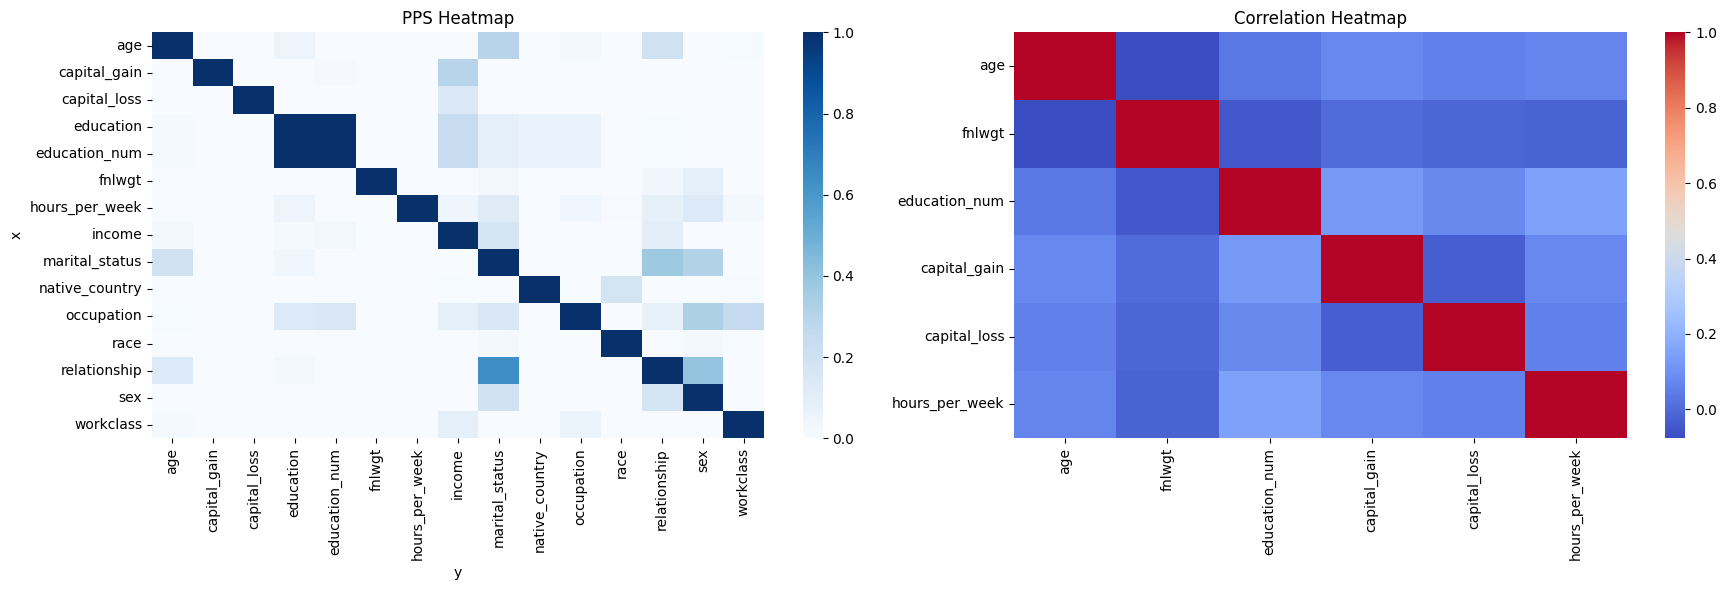

In [84]:
plt.figure(figsize=(18, 6))

# --- PPS Heatmap ---
plt.subplot(1, 2, 1)
pps_heatmap = pps.matrix(df).pivot(index='x', columns='y', values='ppscore')
sns.heatmap(pps_heatmap, cmap="Blues", annot=False, cbar=True)
plt.title("PPS Heatmap")

# --- Correlation Heatmap ---
plt.subplot(1, 2, 2)
corr_matrix = df.corr(numeric_only=True)  # Only numeric columns
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

**Key Insights :**
* Correlation can only detect linear relationships, where ppscores work with linear and non linear both relationships which helps in features selection in tree based models.
* High pp score mean feature is good in predicting the target.

### RFE (Recursive Feature Elimination)

In [90]:
df1_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_Elderly,age_group_Intermediate,age_group_Senior,age_group_Young,Anamoly
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,1,0,1,0,1,0,0,1
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,1,0,1,0,0,1,0,1
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,1,0,0,0,1,0,0,1,0,1
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,0,1,1,0,0,0,0,1,1
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,0,1,0,1,0,1,0,0,1
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,0,1,1,0,0,0,1,0,1
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,1,0,1,0,0,0,1,1


In [92]:
df1_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'net_capital', 'net_capital_log', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'age_group_Elderly', 'age_group_Intermediate',
       'age_group_Senior', 'age_group_Young', 'Anamoly'],
      dtype='object')

In [101]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


X = df1_encoded.drop(['income'], axis=1)
Y = df1_encoded['income']
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(estimator = model,n_features_to_select=8)
fit = rfe.fit(X, Y)


In [102]:
fit.n_features_

8

In [103]:
fit.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False])

In [104]:
fit.get_feature_names_out()

array(['education_num', 'capital_gain', 'net_capital', 'sex_Female',
       'sex_Male', 'age_group_Intermediate', 'age_group_Senior',
       'age_group_Young'], dtype=object)

In [105]:
fit.ranking_

array([ 5, 15, 13, 16,  1, 11, 17, 12,  1,  7,  8, 19,  1, 18, 10,  6, 14,
        9,  2,  1,  1,  4,  1,  1,  1,  3])

**Key Insights :** 
* Using RFE we can also decide the features which we can select.
* We can see,  the list of features name which are predictive for target income.